In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("New Project 2_Ranking_2022-10-27_17-24-28.csv")

In [3]:
df = df.set_index("Name")
labels = [col for col in df.columns if "covid" in col.lower()]
y = df[labels]
y_lab = y[labels[11]]
df = df[df[labels[11]].isna() == False]
y_lab = y_lab[y_lab.isna() == False]
x = df.drop(labels, axis=1)
bad_col = [c for c in x.columns if x[c].isna().sum() > 10]
x = x.drop(bad_col, axis=1)

In [4]:
for c in x.columns:
    x[c].fillna(value=x[c].mean(), inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x, y_lab, test_size=0.15, random_state=42)

In [6]:
for c in X_train.columns:
    if X_train[c].isna().sum()> 1:
        print(c)
X_train.isna().sum().sum()
lm = LinearRegression().fit(X_train, y_train)

In [7]:
y_pred = lm.predict(X_test)

Coefficients: 
 [-1.42730755e-04  7.78062439e-02  8.41896417e-02 -8.37193773e-02
  8.28906798e-02  7.65071775e-02  7.69774484e-02  1.60696823e-01
  1.28421239e-02 -7.70061249e-02 -6.06332544e-02 -2.46328506e-02
 -4.76790646e-02 -4.73487996e-02 -4.80202587e-02 -6.51231722e-02
 -5.12996657e-02 -2.39961371e-02 -1.01594931e-02 -1.14193000e-02
 -3.69822879e-02 -1.54034950e-02 -7.13747366e-01 -7.00816825e-01
  1.60696824e-01  1.58605813e-01  1.59030183e-01  1.61116935e-01
  1.54486515e-01  1.67713415e-01  1.59513777e-01  1.54350440e-01
 -1.13871300e-02 -1.22580015e-01 -6.86567787e-02 -9.48174302e-02
 -8.34590768e-02 -8.75510769e-02 -8.79144668e-02 -8.94597388e-02
 -1.04446356e-01 -9.61209415e-02 -1.52250978e-02 -1.97348165e-02
 -1.70522032e-02 -6.94598678e-02 -1.74477504e-02 -2.34931091e-01
  1.63637453e-01  6.47531542e-02  8.63730692e-02  1.06647608e-01
  7.82680207e-02  6.53956113e-02  6.62191169e-02  6.49408969e-02
  2.27641977e-01 -1.25202807e+00  5.21986808e-01  1.77682137e+00
  1.22473

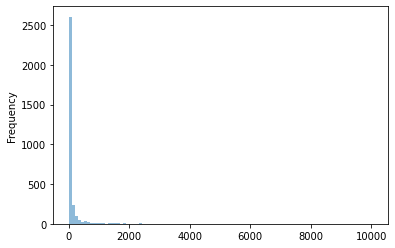

In [8]:
# The coefficients
print("Coefficients: \n", lm.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))
ax = y_lab.plot.hist(bins=100, alpha=0.5)
